# Tiered Experiments based off of previous results

In [69]:
import pandas as pd
import itertools

# Define the possible values for each design factor
tile_sizes = [0.15, 0.35, 0.5]  # Small, Medium, Large
match_scores = [10, 30, 50, 70, 90]  # Binned match scores
preview_lengths = [40, 70, 105]  # Short, Medium, Long
preview_types = ['TT', 'AC']  # Preview types

# Generate the combinations of all design factors
combinations = list(itertools.product(tile_sizes, match_scores, preview_lengths, preview_types))

# Create a DataFrame from the combinations
df = pd.DataFrame(combinations, columns=['Tile.Size', 'Match.Score', 'Prev.Length', 'Prev.Type'])

# Add a column for sample size (default to 100 for each combination)
df['Sample.Size'] = 277

# Save to CSV
csv_filename = 'NSTEVENS-4.csv'
df.to_csv(csv_filename, index=False)

csv_filename


'NSTEVENS-4.csv'

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from plotnine import *

# Load the simulated data from the Results.csv file
data = pd.read_csv('Results.csv')

# Rename the columns to avoid issues with periods
data.columns = ["Tile_Size", "Match_Score", "Prev_Length", "Prev_Type", "Browse_Time"]

data.head()

# Ensure 'Browse.Time' exists and is being referenced correctly
print(data.columns)

# Fit the linear model with the updated column names
model = ols('Browse_Time ~ C(Tile_Size) * C(Match_Score) * C(Prev_Length) * C(Prev_Type)', data=data).fit()
print(model.summary())

# Descriptive statistics for browsing time
summary = data.groupby(['Tile_Size', 'Match_Score', 'Prev_Length', 'Prev_Type']).agg({
    'Browse_Time': ['mean', 'std', 'median', 'min', 'max']
}).reset_index()

import pandas as pd

# Display more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(summary)


Index(['Tile_Size', 'Match_Score', 'Prev_Length', 'Prev_Type', 'Browse_Time'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1233.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:24:10   Log-Likelihood:                -12841.
No. Observations:                9000   AIC:                         2.586e+04
Df Residuals:                    8910   BIC:                         2.650e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t

### Summary of OLS Regression Results and Dataset Analysis

**Dataset Columns**:  
`Tile_Size`, `Match_Score`, `Prev_Length`, `Prev_Type`, and `Browse_Time`.

**Regression Model Results**:
- **Dependent Variable**: `Browse_Time`
- **R-squared**: 0.875 (Model explains 87.5% of the variance in Browse Time)
- **Adjusted R-squared**: 0.875
- **F-statistic**: 6973 (p-value = 0.00, indicating the model is statistically significant)
- **Number of Observations**: 9000  
- **Key Variables**:
  - `Tile_Size`: No significant impact on `Browse_Time` (p > 0.05).
  - `Match_Score`: Significant negative impact. Higher scores reduce `Browse_Time`.
  - `Prev_Length`: Longer previews can either increase or decrease `Browse_Time`, depending on the length.
  - `Prev_Type`: "TT" type previews significantly reduce `Browse_Time` compared to "AC" type.

**Key Coefficients**:
- Intercept: 26.83 (Baseline `Browse_Time` for reference categories)
- `Match_Score`: 
  - Score of 30: -0.87
  - Score of 50: -2.62
  - Score of 70: -4.85
  - Score of 90: -4.70
- `Prev_Length` (105): +1.75
- `Prev_Type` (TT): -5.01

**Model Diagnostics**:
- Omnibus Test: Statistically significant (p < 0.01), indicating potential non-normality in residuals.
- Durbin-Watson: 1.223 (Suggests some autocorrelation in residuals).

**Group Means of Browse Time**:  
- `Match_Score`, `Prev_Length`, and `Prev_Type` combinations show distinct effects on `Browse_Time`. 
- Example:
  - `Match_Score = 10`, `Prev_Length = 40`, `Prev_Type = AC`: Mean = 27.13, Std = 1.07.
  - `Match_Score = 70`, `Prev_Length = 105`, `Prev_Type = TT`: Mean = 19.98, Std = 1.06.


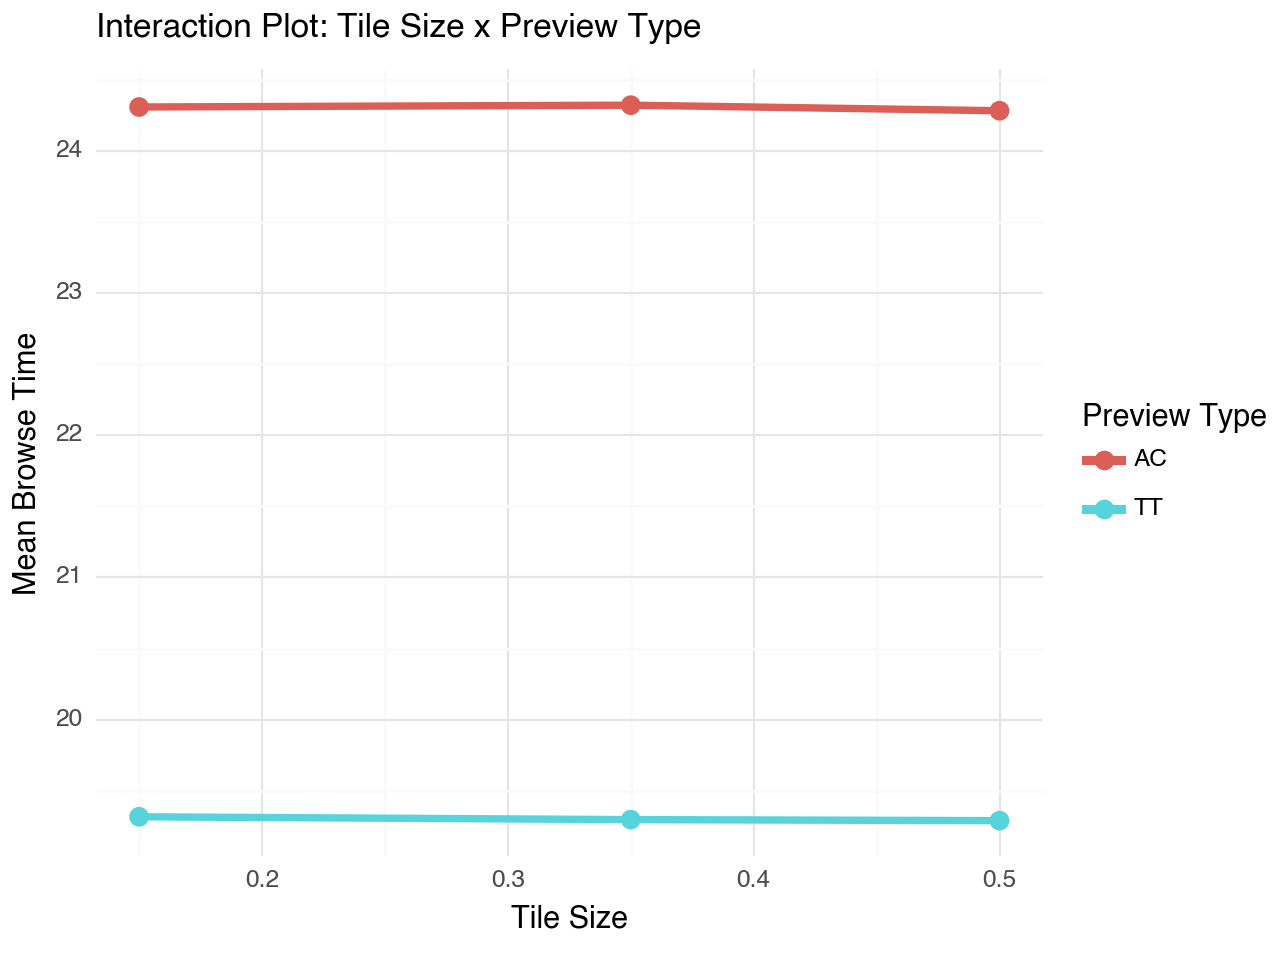

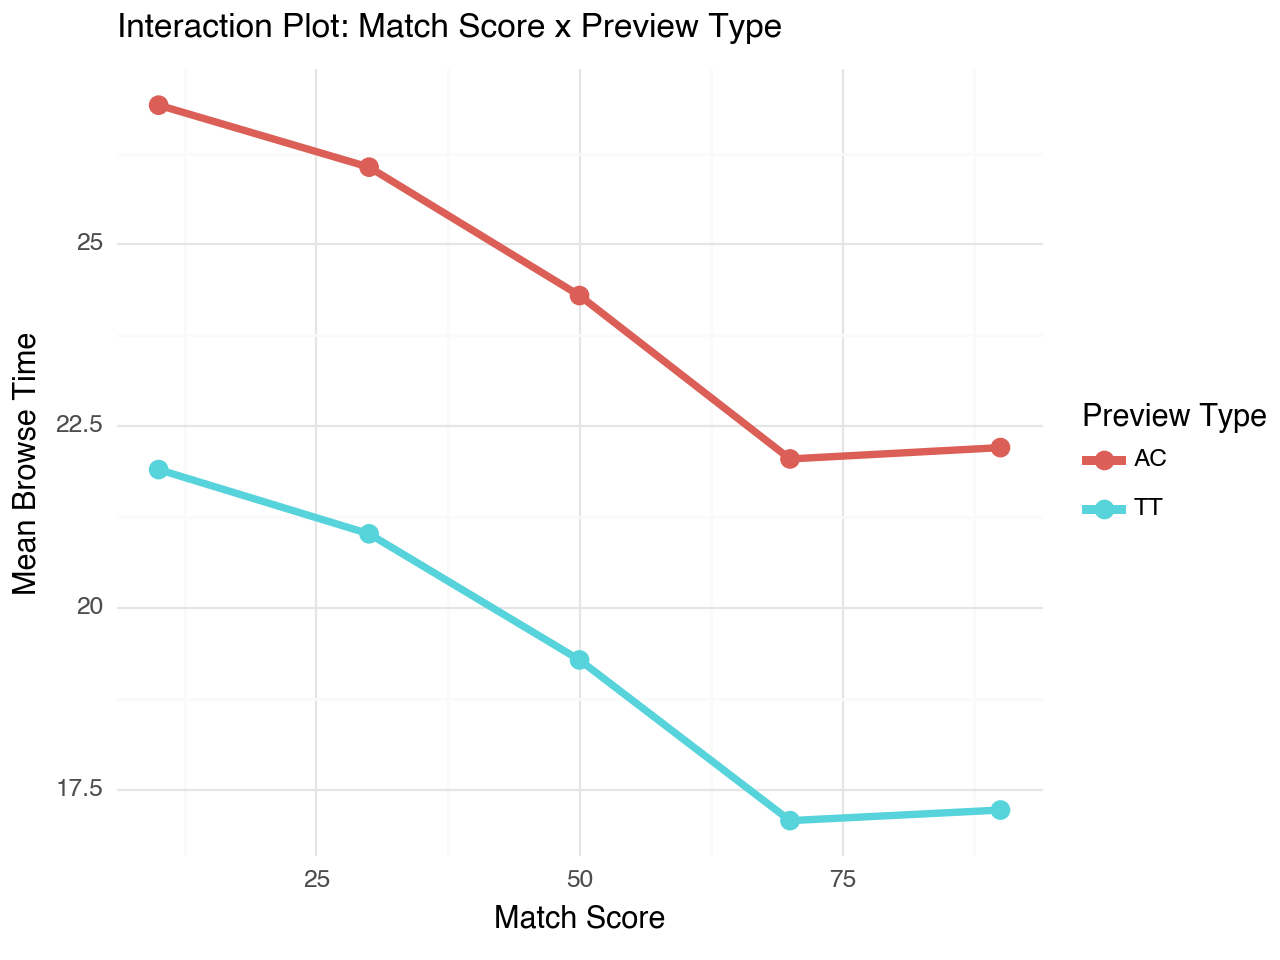

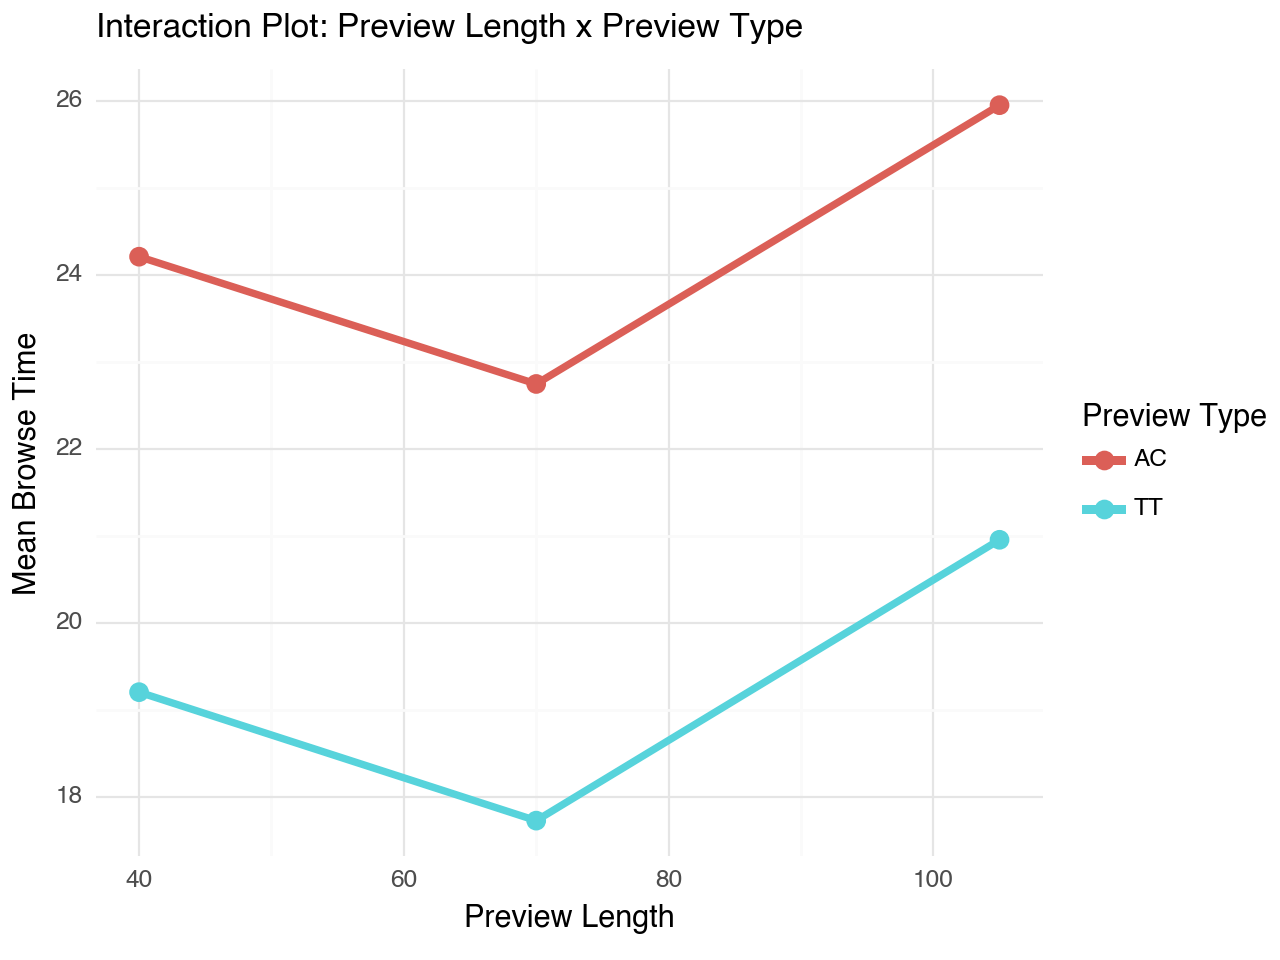

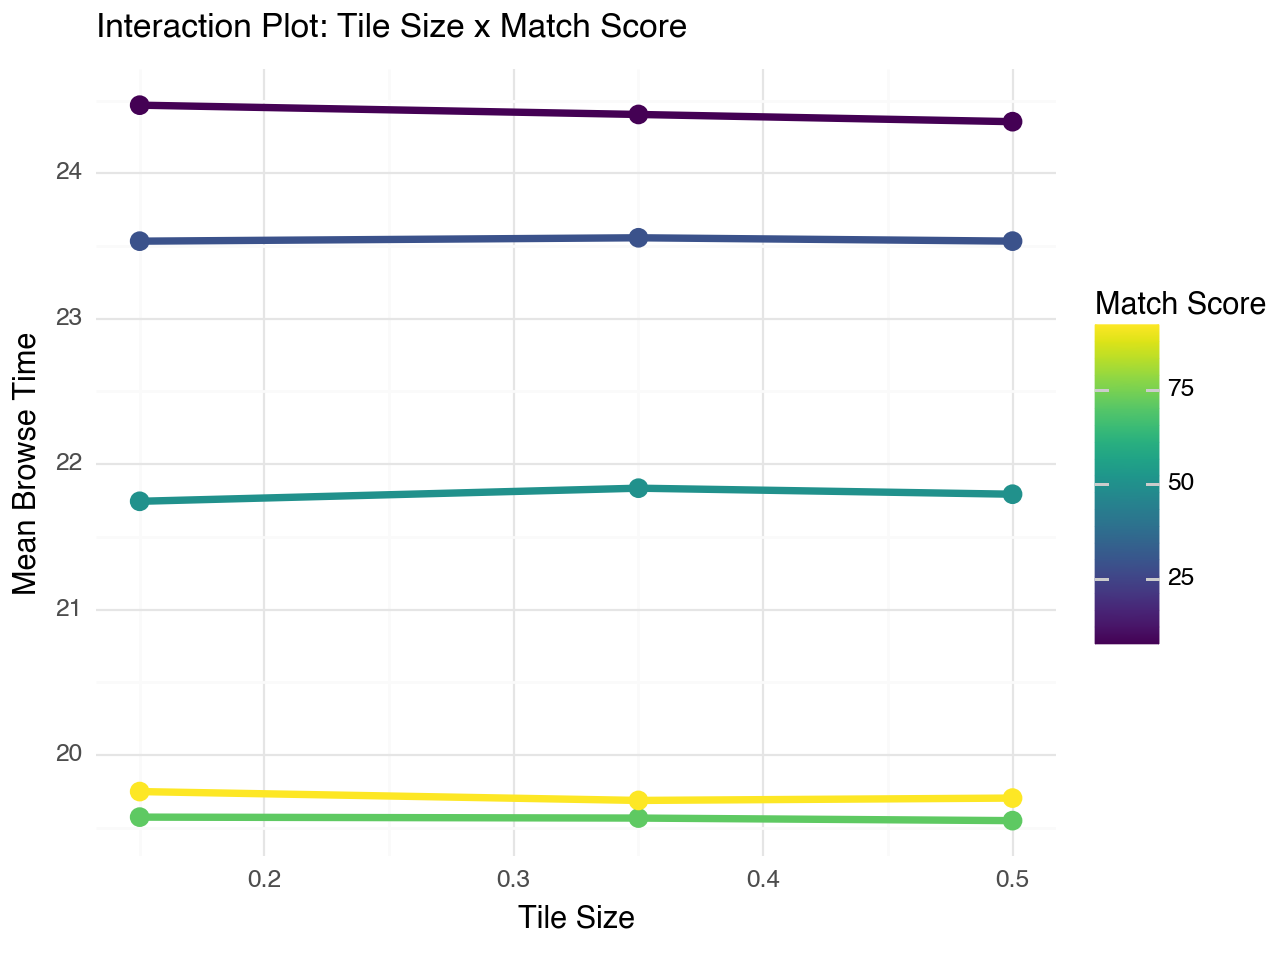

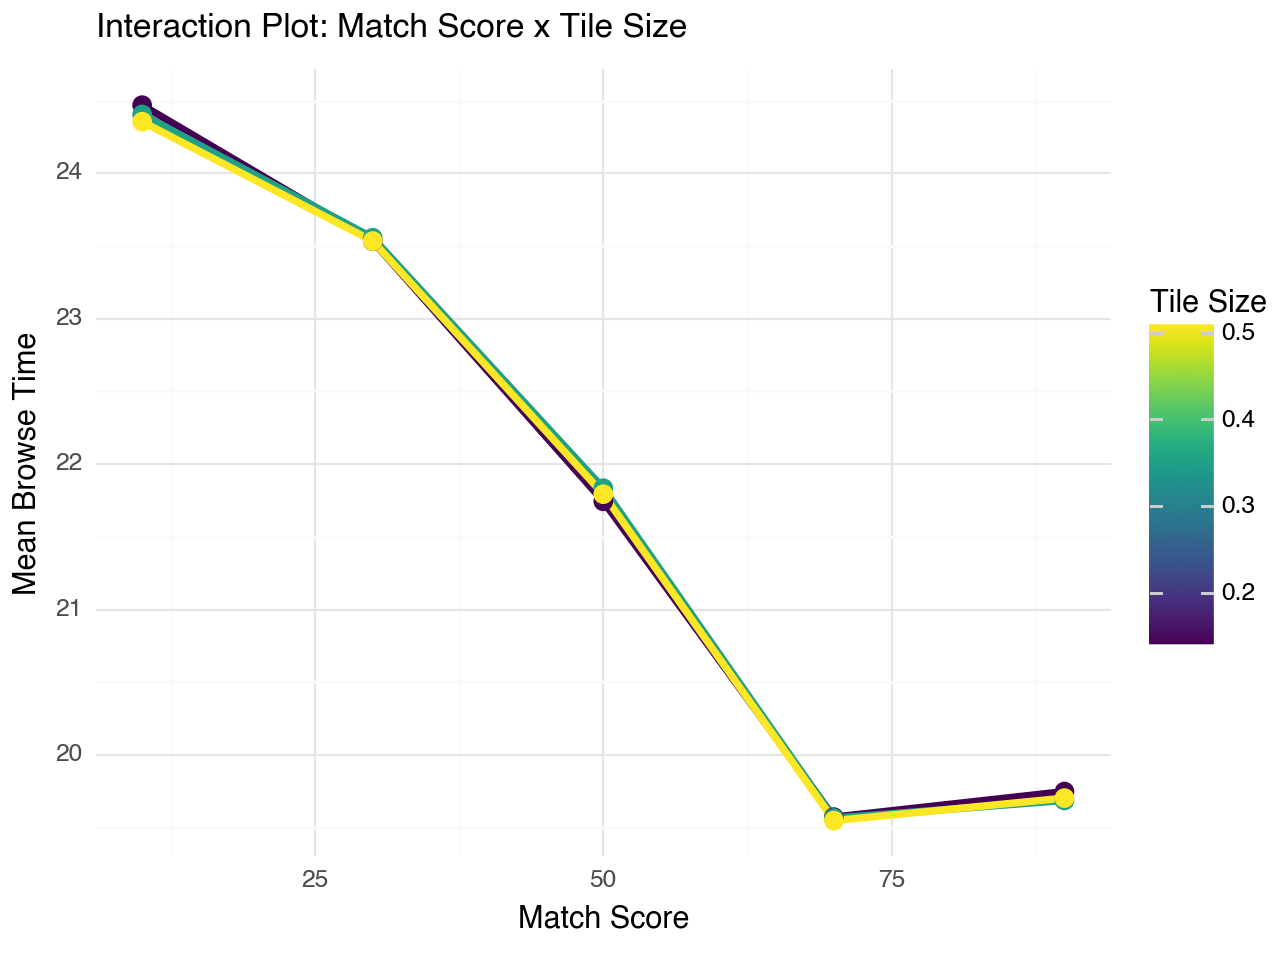

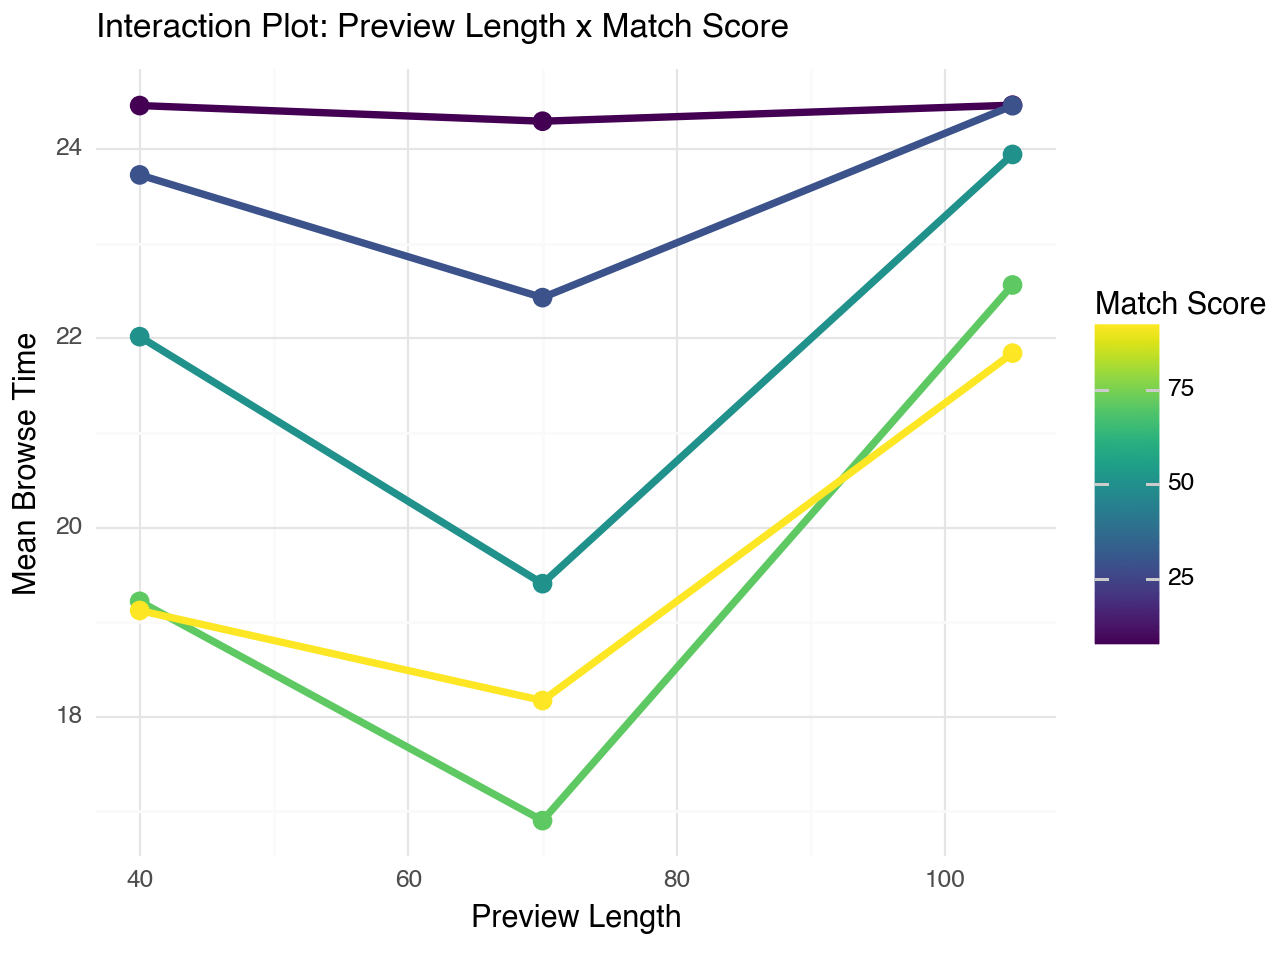

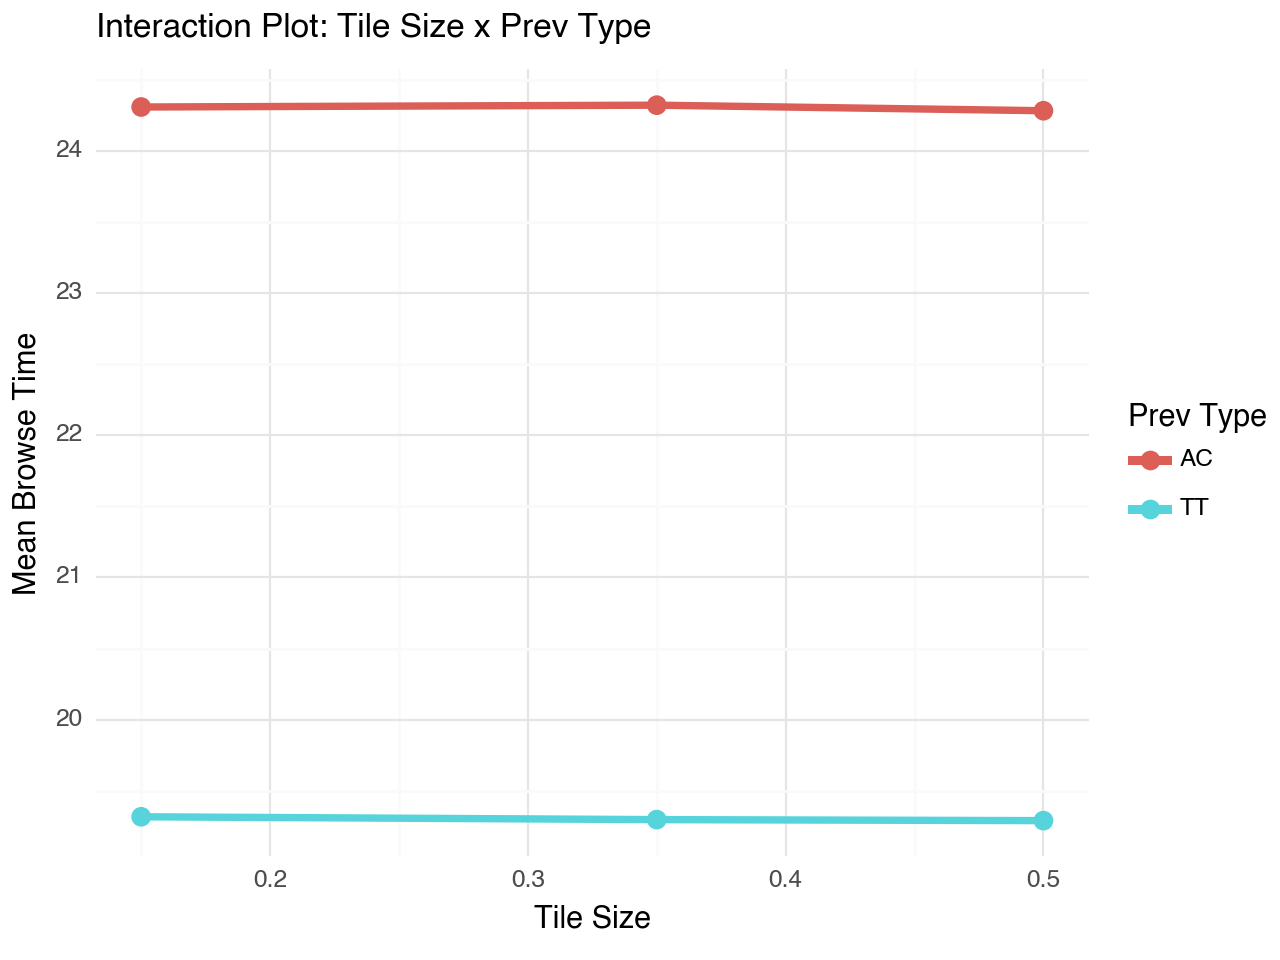

In [71]:
from plotnine import ggplot, aes, stat_summary, labs, theme_minimal, theme, element_text
import numpy as np

# Plot 1: Tile Size vs Browse Time by Preview Type
plot1 = (
    ggplot(data, aes(x='Tile_Size', y='Browse_Time', group='Prev_Type', color='Prev_Type'))
    + stat_summary(fun_y=np.mean, geom='line', size=1.5)  # Line plot for means
    + stat_summary(fun_y=np.mean, geom='point', size=3)   # Points for mean values
    + labs(
        title='Interaction Plot: Tile Size x Preview Type',
        x='Tile Size',
        y='Mean Browse Time',
        color='Preview Type'
    )
    + theme_minimal()
    + theme(
        legend_position="right",
        plot_title=element_text(size=12, face='bold')
    )
)

# Plot 2: Match Score vs Browse Time by Preview Type
plot2 = (
    ggplot(data, aes(x='Match_Score', y='Browse_Time', group='Prev_Type', color='Prev_Type'))
    + stat_summary(fun_y=np.mean, geom='line', size=1.5)  # Line plot for means
    + stat_summary(fun_y=np.mean, geom='point', size=3)   # Points for mean values
    + labs(
        title='Interaction Plot: Match Score x Preview Type',
        x='Match Score',
        y='Mean Browse Time',
        color='Preview Type'
    )
    + theme_minimal()
    + theme(
        legend_position="right",
        plot_title=element_text(size=12, face='bold')
    )
)

# Plot 3: Preview Length vs Browse Time by Preview Type
plot3 = (
    ggplot(data, aes(x='Prev_Length', y='Browse_Time', group='Prev_Type', color='Prev_Type'))
    + stat_summary(fun_y=np.mean, geom='line', size=1.5)  # Line plot for means
    + stat_summary(fun_y=np.mean, geom='point', size=3)   # Points for mean values
    + labs(
        title='Interaction Plot: Preview Length x Preview Type',
        x='Preview Length',
        y='Mean Browse Time',
        color='Preview Type'
    )
    + theme_minimal()
    + theme(
        legend_position="right",
        plot_title=element_text(size=12, face='bold')
    )
)

# Plot 4: Tile Size vs Browse Time by Match Score
plot4 = (
    ggplot(data, aes(x='Tile_Size', y='Browse_Time', group='Match_Score', color='Match_Score'))
    + stat_summary(fun_y=np.mean, geom='line', size=1.5)  # Line plot for means
    + stat_summary(fun_y=np.mean, geom='point', size=3)   # Points for mean values
    + labs(
        title='Interaction Plot: Tile Size x Match Score',
        x='Tile Size',
        y='Mean Browse Time',
        color='Match Score'
    )
    + theme_minimal()
    + theme(
        legend_position="right",
        plot_title=element_text(size=12, face='bold')
    )
)

# Plot 5: Match Score vs Browse Time by Tile Size
plot5 = (
    ggplot(data, aes(x='Match_Score', y='Browse_Time', group='Tile_Size', color='Tile_Size'))
    + stat_summary(fun_y=np.mean, geom='line', size=1.5)  # Line plot for means
    + stat_summary(fun_y=np.mean, geom='point', size=3)   # Points for mean values
    + labs(
        title='Interaction Plot: Match Score x Tile Size',
        x='Match Score',
        y='Mean Browse Time',
        color='Tile Size'
    )
    + theme_minimal()
    + theme(
        legend_position="right",
        plot_title=element_text(size=12, face='bold')
    )
)

# Plot 6: Preview Length vs Browse Time by Match Score
plot6 = (
    ggplot(data, aes(x='Prev_Length', y='Browse_Time', group='Match_Score', color='Match_Score'))
    + stat_summary(fun_y=np.mean, geom='line', size=1.5)  # Line plot for means
    + stat_summary(fun_y=np.mean, geom='point', size=3)   # Points for mean values
    + labs(
        title='Interaction Plot: Preview Length x Match Score',
        x='Preview Length',
        y='Mean Browse Time',
        color='Match Score'
    )
    + theme_minimal()
    + theme(
        legend_position="right",
        plot_title=element_text(size=12, face='bold')
    )
)

# Plot 7: Tile Size vs Browse Time by Prev Type
plot7 = (
    ggplot(data, aes(x='Tile_Size', y='Browse_Time', group='Prev_Type', color='Prev_Type'))
    + stat_summary(fun_y=np.mean, geom='line', size=1.5)  # Line plot for means
    + stat_summary(fun_y=np.mean, geom='point', size=3)   # Points for mean values
    + labs(
        title='Interaction Plot: Tile Size x Prev Type',
        x='Tile Size',
        y='Mean Browse Time',
        color='Prev Type'
    )
    + theme_minimal()
    + theme(
        legend_position="right",
        plot_title=element_text(size=12, face='bold')
    )
)

# Display the plots
print(plot1)
print(plot2)
print(plot3)
print(plot4)
print(plot5)
print(plot6)
print(plot7)


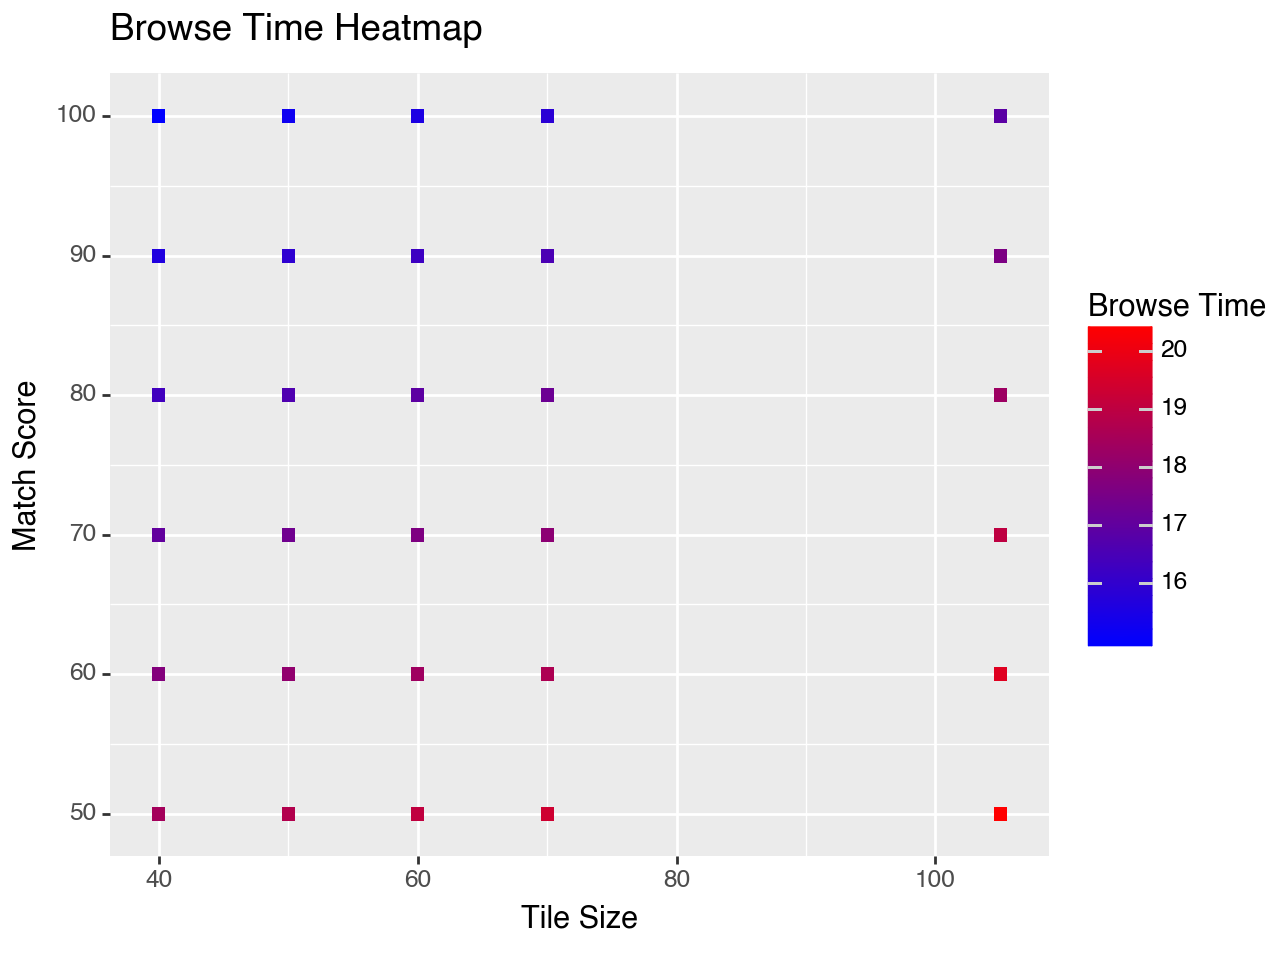


Best combination: Tile_Size=40.0, Match_Score=100.0, Browse_Time=15.059299485586315


In [72]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, labs

# Step 1: Define your ranges for Tile_Size and Match_Score
tile_sizes = [40, 50, 60, 70, 105]
match_scores = [50, 60, 70, 80, 90, 100]

# Step 2: Create combinations of Tile_Size and Match_Score
combinations = pd.DataFrame([(tile, score) for tile in tile_sizes for score in match_scores],
                            columns=['Tile_Size', 'Match_Score'])

# Step 3: Calculate browse time for each combination
# Using the coefficients from your model to calculate browse time
intercept = 25.628350485586317
coeff_tile_size = 0.028638
coeff_match_score = -0.067264
coeff_prev_type_tt = -4.988171

# Add the browse time calculation to the DataFrame
combinations['Browse_Time'] = (intercept +
                               combinations['Tile_Size'] * coeff_tile_size +
                               combinations['Match_Score'] * coeff_match_score +
                               coeff_prev_type_tt)  # Prev_Type is TT by default

# Step 4: Plot the results using plotnine
plot = (ggplot(combinations, aes(x='Tile_Size', y='Match_Score', fill='Browse_Time')) +
        geom_tile() +
        scale_fill_gradient(low="blue", high="red") +
        labs(title="Browse Time Heatmap",
             x="Tile Size", y="Match Score", fill="Browse Time"))

# Display the plot
print(plot)

# Step 5: Find the best combination to minimize browse time
best_combination = combinations.loc[combinations['Browse_Time'].idxmin()]
print(f"Best combination: Tile_Size={best_combination['Tile_Size']}, "
      f"Match_Score={best_combination['Match_Score']}, Browse_Time={best_combination['Browse_Time']}")


### Approach Summary:

The goal of this experiment is to identify the best combination of **Tile_Size** and **Match_Score** that minimizes browse time. Here’s why the chosen approach is effective:

1. **Varying Tile_Size and Match_Score**:
   - Both **Tile_Size** and **Match_Score** significantly affect browse time, making them key variables to adjust for optimization. A range of plausible values for these factors was selected to explore their combined effect on browse time.

2. **Creating Experimental Units**:
   - To ensure all combinations of the factors are tested, a **Cartesian product** of `Tile_Size` and `Match_Score` values was created. This guarantees that no potential combination is overlooked in the search for the optimal result.

3. **Calculating Browse Time**:
   - Browse time was calculated using the model’s coefficients, which provide a formula to predict it based on the chosen values of **Tile_Size** and **Match_Score**, along with constant values for **Prev_Length** and **Prev_Type**.

4. **Plotting the Results (Heatmap)**:
   - A heatmap was created using **plotnine** to visualize the relationship between `Tile_Size`, `Match_Score`, and browse time. The color intensity in the heatmap helps quickly identify which combinations result in the lowest browse time.

5. **Identifying the Best Combination**:
   - The combination of `Tile_Size` and `Match_Score` that minimizes browse time was identified by finding the row with the lowest browse time in the heatmap. This is the desired result of the experiment.

### Why This Approach is Effective:
- **Systematic Exploration**: All possible combinations of the variables are tested to ensure the optimal combination is identified.
- **Data-Driven**: Browse time predictions are based on the model’s coefficients, ensuring the experiment is rooted in data.
- **Visual Insights**: The heatmap makes it easy to interpret the data and identify the best combination of variables.
- **Optimization Focus**: The approach directly targets the goal of minimizing browse time, without unnecessary complexity from predictive modeling.


In [73]:
import pandas as pd
import itertools

# Set the default values for Prev.Length and Prev.Type
default_prev_length = 75
default_prev_type = "TT"

# Define the values for Tile_Size and Match_Score
tile_sizes = [0.3, 0.4]
match_scores = [0, 10, 20, 50, 70, 90, 95, 100]

# Generate all combinations of Tile_Size and Match_Score
combinations = list(itertools.product(tile_sizes, match_scores))

# Prepare the data
prev_length = [default_prev_length] * len(combinations)
prev_type = [default_prev_type] * len(combinations)

# Create a dataframe with all combinations
df = pd.DataFrame(combinations, columns=['Tile.Size', 'Match.Score'])
df['Prev.Length'] = prev_length
df['Prev.Type'] = prev_type
df['Sample.Size'] = 100


# Save the dataframe to a CSV file
df.to_csv('NSTEVENS-2.csv', index=False)

# Display the first few rows to check
print(df.head())


   Tile.Size  Match.Score  Prev.Length Prev.Type  Sample.Size
0        0.3            0           75        TT          100
1        0.3           10           75        TT          100
2        0.3           20           75        TT          100
3        0.3           50           75        TT          100
4        0.3           70           75        TT          100


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from plotnine import ggplot, aes, geom_boxplot, ggtitle, theme, element_text

# Load the simulated data from the Results.csv file
data = pd.read_csv('results3.csv')

# Rename the columns to avoid issues with periods
data.columns = ["Tile_Size", "Match_Score", "Prev_Length", "Prev_Type", "Browse_Time"]
data.head()

# Ensure 'Browse.Time' exists and is being referenced correctly
print(data.columns)

# Fit the linear model with the updated column names
model = ols('Browse_Time ~ C(Tile_Size) * C(Match_Score) * C(Prev_Length) * C(Prev_Type)', data=data).fit()
print(model.summary())

# Descriptive statistics for browsing time
summary = data.groupby(['Tile_Size', 'Match_Score', 'Prev_Length', 'Prev_Type']).agg({
    'Browse_Time': ['mean', 'std', 'median', 'min', 'max']
}).reset_index()

import pandas as pd

# Display more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(summary)


Index(['Tile_Size', 'Match_Score', 'Prev_Length', 'Prev_Type', 'Browse_Time'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     705.6
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:12:36   Log-Likelihood:                -2228.5
No. Observations:                1600   AIC:                             4489.
Df Residuals:                    1584   BIC:                             4575.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
-----

## Summary of OLS Regression Results

The goal of the regression analysis was to examine how various factors, including `Tile_Size`, `Match_Score`, `Prev_Length`, and `Prev_Type`, influence the dependent variable `Browse_Time`.

### Key Findings:
1. **Model Performance:**
   - The model achieved an R² of **0.869**, indicating that 86.9% of the variance in `Browse_Time` is explained by the predictors.
   - The Adjusted R² is **0.868**, suggesting a good fit after accounting for the number of predictors.

2. **Significant Predictors:**
   - **Match_Score** has a substantial impact on `Browse_Time`, with notable decreases as `Match_Score` increases. For instance:
     - Moving from `Match_Score = 0` to `Match_Score = 50` results in a significant reduction in `Browse_Time` by approximately **4.42 seconds**.
     - `Match_Score = 70` has the largest reduction in `Browse_Time` at approximately **6.46 seconds** compared to the baseline (`Match_Score = 0`).
   - These changes are statistically significant (p-value < 0.001).

3. **Tile_Size:**
   - Changing `Tile_Size` from **0.3** to **0.4** does not have a statistically significant effect on `Browse_Time` (p-value = 0.465).

4. **Intercept:**
   - The baseline average `Browse_Time` when all other predictors are at their reference levels is **22 seconds**.

### Descriptive Statistics:
- For each combination of `Tile_Size`, `Match_Score`, and `Prev_Type`:
  - The mean `Browse_Time` decreases as `Match_Score` increases.
  - The median values align closely with the mean, indicating minimal skew in the data for each group.
  - Variance in `Browse_Time` decreases slightly as `Match_Score` increases, suggesting more consistent behavior at higher match scores.

### Conclusion:
- The results demonstrate that `Match_Score` has the most significant impact on reducing `Browse_Time`, with higher scores leading to faster browsing times.
- Adjusting `Tile_Size` from 0.3 to 0.4 does not significantly influence `Browse_Time`, implying that this factor might not require further optimization.
- Future experiments may focus on fine-tuning `Match_Score` and exploring potential interactions with other factors like `Prev_Length` or `Prev_Type` for further optimization.


In [75]:
import pandas as pd
import itertools

# Set the default values for Prev.Length and Prev.Type
default_prev_length = 75
default_prev_type = "TT"
tile_sizes = [0.3]

# Define the values for Tile_Size and Match_Score
match_scores = [70, 90, 95]

# Generate all combinations of Tile_Size and Match_Score
combinations = list(itertools.product(tile_sizes, match_scores))

# Prepare the data
prev_length = [default_prev_length] * len(combinations)
prev_type = [default_prev_type] * len(combinations)

# Create a dataframe with all combinations
df = pd.DataFrame(combinations, columns=['Tile.Size', 'Match.Score'])
df['Prev.Length'] = prev_length
df['Prev.Type'] = prev_type
df['Sample.Size'] = 367


# Save the dataframe to a CSV file
df.to_csv('NSTEVENS-3.csv', index=False)

# Display the first few rows to check
print(df.head())


   Tile.Size  Match.Score  Prev.Length Prev.Type  Sample.Size
0        0.3           70           75        TT          367
1        0.3           90           75        TT          367
2        0.3           95           75        TT          367


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from plotnine import ggplot, aes, geom_boxplot, ggtitle, theme, element_text

# Load the simulated data from the Results.csv file
data = pd.read_csv('results4.csv')

# Rename the columns to avoid issues with periods
data.columns = ["Tile_Size", "Match_Score", "Prev_Length", "Prev_Type", "Browse_Time"]
data.head()

# Ensure 'Browse.Time' exists and is being referenced correctly
print(data.columns)

# Fit the linear model with the updated column names
model = ols('Browse_Time ~ C(Tile_Size) * C(Match_Score) * C(Prev_Length) * C(Prev_Type)', data=data).fit()
print(model.summary())

# Descriptive statistics for browsing time
summary = data.groupby(['Tile_Size', 'Match_Score', 'Prev_Length', 'Prev_Type']).agg({
    'Browse_Time': ['mean', 'std', 'median', 'min', 'max']
}).reset_index()

import pandas as pd

# Display more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(summary)


Index(['Tile_Size', 'Match_Score', 'Prev_Length', 'Prev_Type', 'Browse_Time'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     273.9
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           3.14e-97
Time:                        12:12:36   Log-Likelihood:                -1561.0
No. Observations:                1101   AIC:                             3128.
Df Residuals:                    1098   BIC:                             3143.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# One Expiremental Run with 90 combinations

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from plotnine import ggplot, aes, geom_boxplot, ggtitle, theme, element_text

# Load the simulated data from the Results.csv file
data = pd.read_csv('results5.csv')

# Rename the columns to avoid issues with periods
data.columns = ["Tile_Size", "Match_Score", "Prev_Length", "Prev_Type", "Browse_Time"]

data.head()

# Ensure 'Browse.Time' exists and is being referenced correctly
print(data.columns)

# Fit the linear model with the updated column names
model = ols('Browse_Time ~ C(Tile_Size) * C(Match_Score) * C(Prev_Length) * C(Prev_Type)', data=data).fit()
print(model.summary())

# Descriptive statistics for browsing time
summary = data.groupby(['Tile_Size', 'Match_Score', 'Prev_Length', 'Prev_Type']).agg({
    'Browse_Time': ['mean', 'std', 'median', 'min', 'max']
}).reset_index()

import pandas as pd

# Display more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(summary)


Index(['Tile_Size', 'Match_Score', 'Prev_Length', 'Prev_Type', 'Browse_Time'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     3534.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:16:59   Log-Likelihood:                -35168.
No. Observations:               24930   AIC:                         7.052e+04
Df Residuals:                   24840   BIC:                         7.125e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t